<a href="https://colab.research.google.com/github/eirikngard/Eika/blob/master/N%C3%A6ring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving LE29Q03_201120.XLSX to LE29Q03_201120.XLSX


In [2]:
header = ['Kundenr','Orgnr','Postnr','Kode','Produkt','Forsikringsnr','Årspremie','NACE']
data = pd.read_excel('LE29Q03_201120.XLSX',names=header,skiprows=1)#, header=None,skiprows=1,names=navn)

In [3]:
colo = ['#84BD00','#60c3e6','#6e6259',
        '#61a100','#3396b9','#928073',
        '#509200','#2588ab','#b1a297',
        '#408500','#197c9f','#c5beb9','#ac333b']

In [5]:
df1 = data.loc[data['Kode']=='N05']
df2 = data.loc[data['Kode']=='N06']
df3 = data.loc[data['Kode']=='N07']
df4 = data.loc[data['Kode']=='N10']
df5 = data.loc[data['Kode']=='N15']
df6 = data.loc[data['Kode']=='N16']
df7 = data.loc[data['Kode']=='N17']
df8 = data.loc[data['Kode']=='N18']
df9 = data.loc[data['Kode']=='N20']
df10 = data.loc[data['Kode']=='N22']
df11= data.loc[data['Kode']=='N25']
df12 = data.loc[data['Kode']=='N31']
df13 = data.loc[data['Kode']=='N33']
df14 = data.loc[data['Kode']=='N35']
df15 = data.loc[data['Kode']=='N40']
df16 = data.loc[data['Kode']=='N53']
df17 = data.loc[data['Kode']=='N55']
df18 = data.loc[data['Kode']=='N56']
df19 = data.loc[data['Kode']=='N57']
df20 = data.loc[data['Kode']=='N70']
df21 = data.loc[data['Kode']=='N80']
df22 = data.loc[data['Kode']=='N85']
df23 = data.loc[data['Kode']=='N95']
df24 = data.loc[data['Kode']=='N97']
df25 = data.loc[data['Kode']=='N98']
#lag dataframe (og mulig fjern duplikater)
res = pd.concat([df1,df2,df3,df4,df5,df6,df7,
                 df8,df9,df10,df11,df12,df13,
                 df14,df15,df16,df17,df18,df19,df20,
                 df21,df22,df23,df24,df25]).drop_duplicates().reset_index(drop=True)

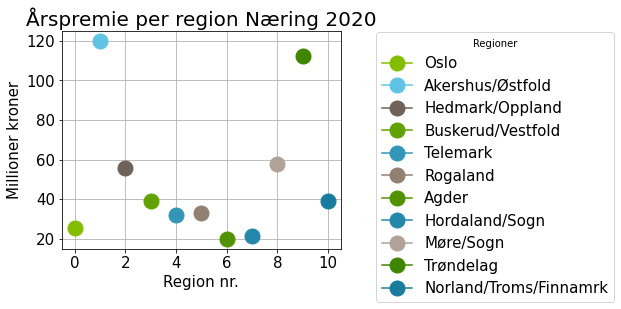

In [8]:

'''
Fylker
'''

a=res.loc[(res['Postnr'] >= '0000')&(res['Postnr'] <= '1299')]#Oslo
b=res.loc[(res['Postnr'] >= '1300')&(res['Postnr'] <= '2149')]
c=res.loc[(res['Postnr'] >= '2150')&(res['Postnr'] <= '2999')]
d=res.loc[(res['Postnr'] >= '3000')&(res['Postnr'] <= '3649')]
e=res.loc[(res['Postnr'] >= '3650')&(res['Postnr'] <= '3999')]
f=res.loc[(res['Postnr'] >= '4000')&(res['Postnr'] <= '4449')]
g=res.loc[(res['Postnr'] >= '4450')&(res['Postnr'] <= '4999')]
h=res.loc[(res['Postnr'] >= '5000')&(res['Postnr'] <= '5999')]
i=res.loc[(res['Postnr'] >= '6000')&(res['Postnr'] <= '6999')]
j=res.loc[(res['Postnr'] >= '7000')&(res['Postnr'] <= '7949')]
k=res.loc[(res['Postnr'] >= '7950')&(res['Postnr'] <= '9999')]

#daa = [aa,bb,cc,dd,ee,ff,gg,hh,ii,jj]
da = [a,b,c,d,e,f,g,h,i,j,k]; 
tit = ['Oslo','Akershus/Østfold','Hedmark/Oppland','Buskerud/Vestfold','Telemark','Rogaland',
       'Agder','Hordaland/Sogn','Møre/Sogn','Trøndelag','Norland/Troms/Finnamrk']
fig,ax = plt.subplots(figsize=(5,4))
for count,vari in enumerate(da):
  ax.plot(count,vari['Årspremie'].sum()/(10**6),marker='o',color=colo[count],markersize=15,label=tit[count])
  ax.legend(bbox_to_anchor=(1.10, 1.03),prop={'size': 15},title='Regioner')
  ax.set_ylabel('Millioner kroner',fontsize=15); ax.set_xlabel('Region nr.',fontsize=15)
  ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
  #ax.set_ylim(0,30); ax.set_xlim(-0.5,10)
  ax.set_title('L21 2020')
ax.set_title('Årspremie per region Næring 2020',size=20)
ax.grid()

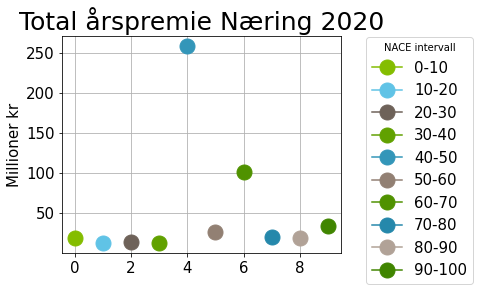

In [11]:

#kategoriene delt inn in 10 og 10 hele tall, NÅ ALLE L

a=res.loc[(res['NACE'] >= '01.000')&(res['NACE'] <= '09.999')]
b=res.loc[(res['NACE'] >= '10.000')&(res['NACE'] <= '19.999')]
c=res.loc[(res['NACE'] >= '20.000')&(res['NACE'] <= '29.999')]
d=res.loc[(res['NACE'] >= '30.000')&(res['NACE'] <= '39.999')]
e=res.loc[(res['NACE'] >= '40.000')&(res['NACE'] <= '49.999')]
f=res.loc[(res['NACE'] >= '50.000')&(res['NACE'] <= '59.999')]
g=res.loc[(res['NACE'] >= '60.000')&(res['NACE'] <= '69.999')]
h=res.loc[(res['NACE'] >= '70.000')&(res['NACE'] <= '79.999')]
i=res.loc[(res['NACE'] >= '80.000')&(res['NACE'] <= '89.999')]
j=res.loc[(res['NACE'] >= '90.000')&(res['NACE'] <= '99.999')]

da = [a,b,c,d,e,f,g,h,i,j]; #farger = [grønn,blå,grå,sjøgrønn]
tit = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
fig,ax = plt.subplots(figsize=(5,4))
for count,vari in enumerate(da):
  ax.plot(count,vari['Årspremie'].sum()/(10**6),marker='o',color=colo[count],markersize=15,label=tit[count])
  ax.legend(bbox_to_anchor=(1.50, 1.03),prop={'size': 15},title="NACE intervall")
  ax.set_ylabel('Millioner kr',fontsize=15)
  ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
  #ax.set_ylim(-1,35); ax.set_xlim(-0.5,10)
  ax.set_title('L21 2020')
ax.set_title('Total årspremie Næring 2020',size=25)
ax.grid()

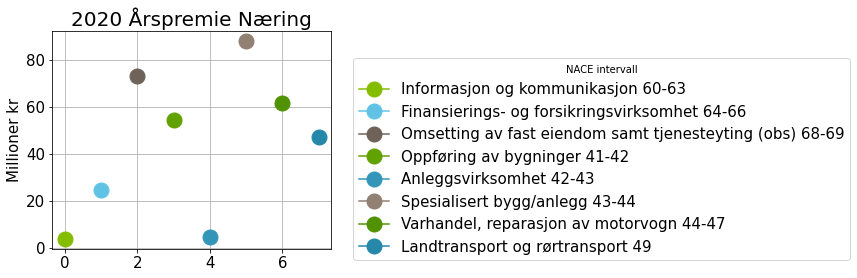

In [21]:
fig, ax = plt.subplots(figsize=(5,4))
'''
De største hovedkategoriene
'''

a=res.loc[(res['NACE'] >= '60.000')&(res['NACE'] <= '63.999')]
b=res.loc[(res['NACE'] >= '64.000')&(res['NACE'] <= '66.999')]
c=res.loc[(res['NACE'] >= '67.000')&(res['NACE'] <= '69.999')]
d=res.loc[(res['NACE'] >= '41.000')&(res['NACE'] <= '41.999')]
e=res.loc[(res['NACE'] >= '42.000')&(res['NACE'] <= '42.999')]
f=res.loc[(res['NACE'] >= '43.000')&(res['NACE'] <= '43.999')]
g=res.loc[(res['NACE'] >= '44.000')&(res['NACE'] <= '47.999')]
h=res.loc[(res['NACE'] >= '48.000')&(res['NACE'] <= '49.999')]

da = [a,b,c,d,e,f,g,h]; #farger = [grønn,blå,grå,sjøgrønn]
farger = [colo[0],colo[3],colo[6],colo[1],colo[4],colo[7],'r']
tit = ['Informasjon og kommunikasjon 60-63','Finansierings- og forsikringsvirksomhet 64-66',
       'Omsetting av fast eiendom samt tjenesteyting (obs) 68-69',
       'Oppføring av bygninger 41-42','Anleggsvirksomhet 42-43',
       'Spesialisert bygg/anlegg 43-44','Varhandel, reparasjon av motorvogn 44-47',
       'Landtransport og rørtransport 49']
#fig,ax = plt.subplots(figsize=(5,4))
for i,j in enumerate(da):
  ax.plot(i,j['Årspremie'].sum()/(10**6),marker='o',color=colo[i],markersize=15,label=tit[i])
  ax.legend(bbox_to_anchor=(1.05, 0.91),prop={'size': 15},title='NACE intervall')
  ax.set_ylabel('Millioner kr',fontsize=15)
  ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
  #ax.set_ylim(0,30); ax.set_xlim(-0.5,4)
ax.set_title('2020 Årspremie Næring',size = 20)
ax.grid()